# Global SuperStore Data Investagation

**Author:** Patrick Earl

Final Project for CSC223

Global Superstore is an excel dataset that contains orders, returns, and people for a fictional retail store. 

Dataset Source: <https://www.kaggle.com/datasets/shekpaul/global-superstore>

## Order Table

Contains information about the orders for the store. Here are some important columns: 

* **Discount:** Contains the discount amount for the given order. 
* **Category:** Category of the product ordered. Can either be Technology, Office Supplies, or Furtinture. 
* **Order-ID:** This column can be used to merge with the return table

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
orders = pd.read_excel('Global Superstore.xlsx', index_col=0)
orders.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
Row ID,,,,,,,,,,,,,,,,,,,,,
32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [3]:
orders.shape

(51290, 23)

In [4]:
list(orders.columns)

['Order ID',
 'Order Date',
 'Ship Date',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'City',
 'State',
 'Country',
 'Postal Code',
 'Market',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Sales',
 'Quantity',
 'Discount',
 'Profit',
 'Shipping Cost',
 'Order Priority']

In [5]:
orders.describe()

,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375818
std,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296810
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.002000
25%,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


## Visualization of a Quantitive Variable

Exploring the discount column

<AxesSubplot:>

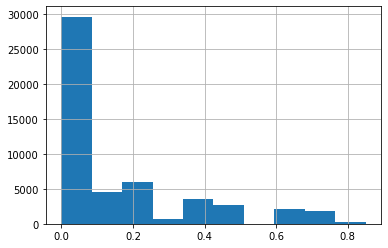

In [6]:
orders['Discount'].hist()

In [7]:
orders.value_counts(subset=['Category', 'Sub-Category']).sort_index()

Category         Sub-Category
Furniture        Bookcases       2411
                 Chairs          3434
                 Furnishings     3170
                 Tables           861
Office Supplies  Appliances      1755
                 Art             4883
                 Binders         6152
                 Envelopes       2435
                 Fasteners       2420
                 Labels          2606
                 Paper           3538
                 Storage         5059
                 Supplies        2425
Technology       Accessories     3075
                 Copiers         2223
                 Machines        1486
                 Phones          3357
dtype: int64

In [8]:
high_discount_orders = orders[orders['Discount'] > 0.75]
high_discount_orders.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
Row ID,,,,,,,,,,,,,,,,,,,,,
36607,CA-2014-131254,2014-11-20,2014-11-22,First Class,NC-18415,Nathan Cano,Consumer,Houston,Texas,United States,...,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,1525.188,6,0.8,-2287.7820,263.47,High
41071,CA-2011-169019,2011-07-26,2011-07-30,Standard Class,LF-17185,Luke Foster,Consumer,San Antonio,Texas,United States,...,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,2177.584,8,0.8,-3701.8928,172.07,Medium
32496,CA-2013-130946,2013-04-09,2013-04-13,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,United States,...,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,1088.792,4,0.8,-1850.9464,169.49,High
37559,CA-2013-132479,2013-09-25,2013-09-27,First Class,MK-17905,Michael Kennedy,Corporate,Rockford,Illinois,United States,...,OFF-BI-10004584,Office Supplies,Binders,GBC ProClick 150 Presentation Binding System,442.372,7,0.8,-729.9138,169.09,Critical
36288,US-2014-122714,2014-12-08,2014-12-14,Standard Class,HG-14965,Henry Goldwyn,Corporate,Chicago,Illinois,United States,...,OFF-BI-10001120,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,1889.990,5,0.8,-2929.4845,129.51,Medium


In [9]:
high_discount_orders.value_counts(subset=['Category', 'Sub-Category']).sort_index()

Category         Sub-Category
Furniture        Furnishings       4
                 Tables           14
Office Supplies  Appliances       67
                 Binders         233
dtype: int64

Investaged the various discount amounts. Orders that got high discounts feel into two categories of office supplies and technology... Findings ....

Would explore why if there was more time.

## Visualization of a Categorical Variable

<BarContainer object of 3 artists>

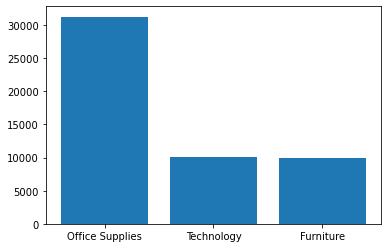

In [10]:
categories = orders['Category'].value_counts()
plt.bar(categories.index, categories.values)

Office supplies make up most of the orders. 

In [11]:
returns = pd.read_excel('Global Superstore.xlsx', sheet_name=1)
returns.head()

,Returned,Order ID,Market
0,Yes,MX-2013-168137,LATAM
1,Yes,US-2011-165316,LATAM
2,Yes,ES-2013-1525878,EU
3,Yes,CA-2013-118311,United States
4,Yes,ES-2011-1276768,EU


In [12]:
orders_and_returns = pd.merge(orders, returns, on="Order ID")
orders_and_returns.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Returned,Market_y
0,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,...,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.765,923.63,Critical,Yes,APAC
1,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,...,Copiers,"Brother Fax and Copier, Laser",344.682,2,0.1,34.422,65.35,Critical,Yes,APAC
2,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,...,Storage,"Rogers Folders, Wire Frame",133.920,5,0.1,-6.030,41.64,Critical,Yes,APAC
3,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,...,Accessories,"Enermax Flash Drive, Erganomic",70.794,2,0.1,25.134,10.48,Critical,Yes,APAC
4,ES-2014-1651774,2014-09-08,2014-09-14,Standard Class,PJ-18835,Patrick Jones,Corporate,Prato,Tuscany,Italy,...,Appliances,"Hoover Stove, Red",7958.580,14,0.0,3979.080,778.32,Low,Yes,EU


In [13]:
orders_and_returns.shape

(3055, 25)

In [14]:
orders_and_returns['Customer Name'].value_counts()

Ted Butterfield     31
Gary Hwang          20
Nat Gilpin          19
Natalie Webber      18
Steven Ward         18
                    ..
Helen Wasserman      1
Ted Trevino          1
Maxwell Schwartz     1
Tim Taslimi          1
Sibella Parks        1
Name: Customer Name, Length: 619, dtype: int64

In [15]:
orders[orders['Category'] == 'Technology']['Sales'].sum()

4744557.498079999

In [17]:
orders.dtypes

Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
City                      object
State                     object
Country                   object
Postal Code              float64
Market                    object
Region                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping Cost            float64
Order Priority            object
dtype: object

In [21]:
orders_by_date = orders.pivot_table(index='Order Date', values='Sales', columns='Category', fill_value=0.0)

In [22]:
orders_by_date

Category,Furniture,Office Supplies,Technology
Order Date,,,
2011-01-01,113.670000,138.978600,0.000000
2011-01-02,0.000000,0.000000,314.220000
2011-01-03,392.164500,106.626245,342.456500
2011-01-04,843.350000,63.292909,141.982747
2011-01-05,48.780000,602.255000,0.000000
...,...,...,...
2014-12-27,351.875325,182.199074,384.481233
2014-12-28,112.350000,137.769750,106.772000
2014-12-29,364.376112,152.474286,304.240427


In [23]:
orders_by_date.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2014-12-22', '2014-12-23', '2014-12-24', '2014-12-25',
               '2014-12-26', '2014-12-27', '2014-12-28', '2014-12-29',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', name='Order Date', length=1430, freq=None)

In [24]:
orders_by_date.loc['2011']

Category,Furniture,Office Supplies,Technology
Order Date,,,
2011-01-01,113.670000,138.978600,0.000000
2011-01-02,0.000000,0.000000,314.220000
2011-01-03,392.164500,106.626245,342.456500
2011-01-04,843.350000,63.292909,141.982747
2011-01-05,48.780000,602.255000,0.000000
...,...,...,...
2011-12-27,356.150017,103.209671,578.700417
2011-12-28,383.109000,212.139226,399.697939
2011-12-29,341.427100,66.554326,316.259573


<AxesSubplot:xlabel='Order Date'>

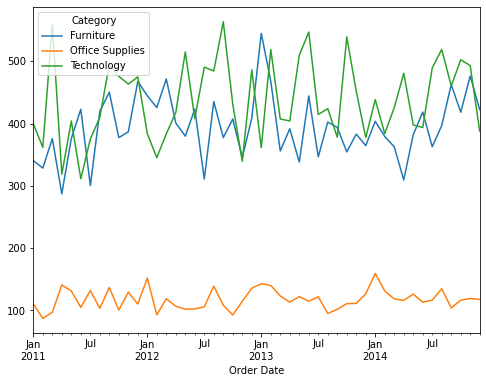

In [27]:
orders_by_date.resample('M').mean().plot(figsize=(8, 6))

<AxesSubplot:xlabel='Order Date'>

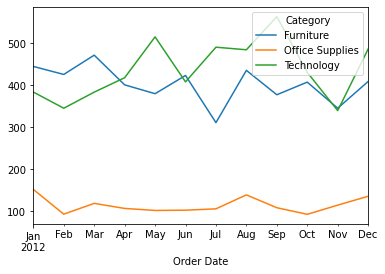

In [29]:
orders_by_date.resample('M').mean().loc['2012'].plot()